In [1148]:
import numpy as np                                # import packages and give them quick handles since they will be used often
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
import math
%matplotlib inline

# DEFINING ERROR FUCNTIONS TO CALCULATE THE UNCERTAINTY IN THE EINSTIEN ANGLE 

DLS_error = DL_error = DS_error = 0.005
ER_error = 0.000005

def delF_delER(ER_error,DS,ER):
    return DS/(ER**2+DS**2)*ER_error

def delF_delDS(DS_error,DS,ER):
    return ER/(ER**2+DS**2)*DS_error

# DEFINING FUNCTIONS FOR MASS UNCERTAINTY CALCULATIONS 

def delM_delEA(EA,DS,DL,DLS,G,c):
    return 2*EA*(c**2/(4*G))*(DS*DL/DLS)

def delM_delDS(EA,DS,DL,DLS,G,c):
    return (EA**2)*(c**2/(4*G))*(DL/DLS)

def delM_delDL(EA,DS,DL,DLS,G,c):   
    return (EA**2)*(c**2/(4*G))*(DS/DLS)

def delM_delDLS(EA,DS,DL,DLS,G,c):  
    return (EA**2)*(c**2/(4*G))*(DS*DL/(DLS**2))

# DEFINING ERROR FUNCTIONS FOR DISTANCE PARAMETER

def delD_delDLS(DLS,DL,DS):
    return 1/(DL*DS)

def delD_delDL(DLS,DL,DS):
    return DLS*((DL**2)*DS)

def delD_delDS(DLS,DL,DS):
    return DLS*((DS**2)*DL)

In [1178]:
# SETTING UP ARRAYS FOR DISTANCE PARAMETERS AND EINSTIEN RADIUS MEASUREMENTS

Array = np.loadtxt('Lens 1 Data.txt', skiprows=1, delimiter=',')
Trial1 = Array[0]
Trial2 = Array[1]
Trial3 = Array[2]
Trial4 = Array[3]
Trial5 = Array[4]

DL = []
DL.append(Trial1[1])
DL.append(Trial2[1])
DL.append(Trial3[1])
DL.append(Trial4[1])
DL.append(Trial5[1])

DLS = []
DLS.append(Trial1[2])
DLS.append(Trial2[2])
DLS.append(Trial3[2])
DLS.append(Trial4[2])
DLS.append(Trial5[2])

ER = []
ER.append(Trial1[3]/2)     # divide by 2 because in the text document we have the diameter measurements 
ER.append(Trial2[3]/2)
ER.append(Trial3[3]/2)
ER.append(Trial4[3]/2)
ER.append(Trial5[3]/2)

print(ER)

print(Array)

[0.0188, 0.02026, 0.020415, 0.02022, 0.02025]
[[1.      0.295   0.33    0.0376 ]
 [2.      0.32    0.305   0.04052]
 [3.      0.34    0.285   0.04083]
 [4.      0.36    0.265   0.04044]
 [5.      0.4     0.25    0.0405 ]]


In [1179]:
# SOLVING FOR THE EINSTIEN ANGLE AND THE UNCERTAINTIES

def angle_func(ER,DS):
    return math.atan(ER/DS)

EA = []
for i in range(5):
    EA.append(angle_func(ER[i], DL[i]+DLS[i]))
    
EA_error = []
for i in range (5):
    EA_error.append(delF_delER(ER_error,DL[i]+DLS[i],ER[i])+delF_delDS(DS_error,DL[i]+DLS[i],ER[i]))
    
print(EA)
print(EA_error)

[0.03007093272979502, 0.03240465294075942, 0.032652390622054835, 0.032340719988767516, 0.031143773104679088]
[0.0002484152323079503, 0.00026704738739151645, 0.0002690249673364036, 0.00026653702851162184, 0.0002470974546745385]


In [1180]:
# CALCULATING THE MASS AND UNCERTAINTIES

c = 3e8
G = 6.67e-11

def mass_func(c, G, EA, DL, DLS, DS):
    return (EA**2)*(c**2)*DS*DL/(4*G*DLS)

mass = []
for i in range(5):
    mass.append(mass_func(c, G, EA[i], DL[i], DLS[i], DL[i]+DLS[i]))
    
EA_differential = []

DS_differential = []
DL_differential = []
DLS_differential = []
mass_error = []

for i in range(5):
    EA_differential.append(delM_delEA(EA[i],DL[i]+DLS[i],DL[i],DLS[i],G,c))
    DS_differential.append(delM_delDS(EA[i],DL[i]+DLS[i],DL[i],DLS[i],G,c))
    DL_differential.append(delM_delDL(EA[i],DL[i]+DLS[i],DL[i],DLS[i],G,c))
    DLS_differential.append(delM_delDLS(EA[i],DL[i]+DLS[i],DL[i],DLS[i],G,c))
    mass_error.append(EA_differential[i]*EA_error[i]+DS_error*(DS_differential[i]+DL_differential[i]+DLS_differential[i]))
    
print(mass)
print(mass_error)

[1.7042706930354575e+23, 2.3227452969989465e+23, 2.6816415450217967e+23, 2.9956612161162767e+23, 3.402769072680681e+23]
[9.650026889617361e+21, 1.3123622948977888e+22, 1.521237852400017e+22, 1.7147127149798065e+22, 1.907608840869499e+22]


In [1181]:
# DISTANCE PARAMETER AND UNCERTAINTY CALCULATIONS 
# note: D = distance paramter: DLS/(DL*DS)

D = []
for i in range(5):
    D.append(DLS[i]/((DL[i]+DLS[i])*DL[i]))
    
D_error = []
for i in range(5):
    D_error.append(DS_error*(delD_delDLS(DLS[i],DL[i],0.65)+delD_delDL(DLS[i],DL[i],0.65)+delD_delDS(DLS[i],DL[i],0.65)))
    
print(D)
print(D_error)

[1.7898305084745765, 1.525, 1.341176470588235, 1.177777777777778, 0.9615384615384615]
[0.02637460548345828, 0.02434614553846154, 0.022936210139140267, 0.021680671867521366, 0.01957201923076923]


offset: -2.0820566169291745e+23 +- 6.24684979474068e+21
offset: 5.4516325208061965e+23 +- 9.534651631262304e+21


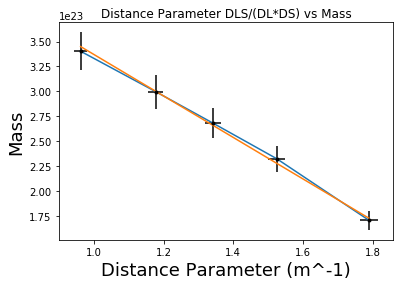

<Figure size 432x288 with 0 Axes>

In [1182]:
plt.plot(D, mass)
plt.errorbar(D, mass, mass_error, D_error, fmt='k.')      

def func(x,m,b):                                 
    return m*x+b                                
 
initialguess = [1e24,-1e23]                     
                                        
fit, covariance = optimize.curve_fit(            
        func,                                    
        D,                                  
        mass,
        initialguess,
        mass_error)   

print("offset:",fit[0],"+-",np.sqrt(covariance[0][0]))    
print("offset:",fit[1],"+-",np.sqrt(covariance[1][1])) 

Dfit=np.linspace(min(D), max(D), 100) 
func_plot=func(Dfit,*fit)    

plt.plot(Dfit, func_plot) 

plt.title('Distance Parameter DLS/(DL*DS) vs Mass')
plt.xlabel('Distance Parameter (m^-1)',fontsize = 18)
plt.ylabel('Mass',fontsize = 18)

plt.show()
plt.savefig("./",dpi=300)         
plt.clf()

In [1183]:
# EVALUATE THE THE POINTS ALONG BESTFIT LINE AT OUR DATA POINTS

def trendline_fit(m,x,b):
    return m*x+b

trendline = []
for i in range(5):
    trendline.append(trendline_fit(fit[0],D[i],fit[1]))
    
print(trendline)

[1.7251040674549956e+23, 2.2764961799892056e+23, 2.6592271757482454e+23, 2.999432505311835e+23, 3.449655004528144e+23]


In [1184]:
# GETTING OUR WEIGHTS, AND THEN CALCULATING WEIGHTED AVERAGE

# WEIGHTED AVERAGE 1 = 2.498685959261379e+23
# WEIGHTED AVERAGE 2 = 9.68019573664252e+22
# WEIGHTED AVERAGE 3 = 4.649682788406193e+22
# WEIGHTED AVERAGE 4 = 2.0671208056661207e+23

weights = []
total_weights = 0

weight_mass = []
total_weight_mass = 0

for i in range(5):
    weights.append(1/mass_error[i])
    total_weights = total_weights + weights[i]
    weight_mass.append(mass[i]*weights[i])
    total_weight_mass = total_weight_mass + weight_mass[i]

print(total_weight_mass/total_weights)

2.478125516801794e+23


offset: 0.2494336494922918 +- 0.08895648374091455
offset: -3.628377389481506e+22 +- 5.942965541817551e+22
[2.131498755974767e+23, 1.5079146322440379e+23, 5.850101291225581e+22, 3.355764796302665e+22]


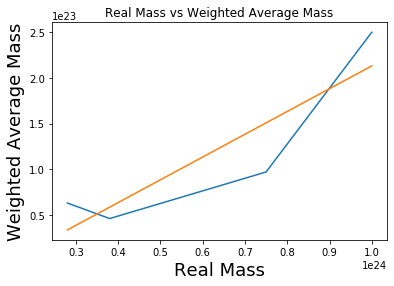

<Figure size 432x288 with 0 Axes>

In [1185]:
# PLOTTING WEIGHTED AVERAGES WITH REAL MASS
Real_Mass = [1e24, 7.5e23, 3.8e23, 2.8e23]
Weighted_Mass = [2.5e23, 9.7e22, 4.6e22, 6.3e22]
plt.plot(Real_Mass, Weighted_Mass)

def func1(x,m,b):                                 
    return m*x+b                                
 
initialguess = [0.25,1e22]                     
                                        
fit, covariance = optimize.curve_fit(            
        func1,   
        Real_Mass,  
        Weighted_Mass,
        initialguess)   

print("offset:",fit[0],"+-",np.sqrt(covariance[0][0]))    
print("offset:",fit[1],"+-",np.sqrt(covariance[1][1])) 

Weighted_Massfit=np.linspace(min(Real_Mass), max(Real_Mass), 100) 
func1_plot=func(Real_Massfit,*fit)   

trendd = []
for i in range(4):
    trendd.append(func1(Real_Mass[i],fit[0],fit[1]))
                  
print(trendd)

plt.plot(Real_Mass,trendd)

# plt.plot(Real_Massfit, func1_plot) 

plt.title('Real Mass vs Weighted Average Mass')
plt.xlabel('Real Mass',fontsize = 18)
plt.ylabel('Weighted Average Mass',fontsize = 18)

plt.show()
plt.savefig("./images",dpi=300)         
plt.clf()

In [1186]:
# CLACULATING STANDARD DEVIATION OF OUR PLOTS
arr1 = Real_Mass
arr2 = Weighted_Mass

def count_between_stddev(arr1, arr2, multiplier=1):
    # combine the arrays into one array
    combined = np.concatenate([arr1, arr2])
    # find the standard deviation of the combined array
    stddev = np.std(combined)
    # find the mean of the combined array
    mean = np.mean(combined)
    # find the lower and upper bounds
    lower = mean - multiplier * stddev
    upper = mean + multiplier * stddev
    # count the number of elements between the lower and upper bounds
    count = len(np.where((combined >= lower) & (combined <= upper))[0])
    return count, stddev, lower, upper

In [1187]:
def report_statistical_significance(count, total, stddev, multiplier):
    # calculate the percentage of elements within the bounds
    percentage = count / total * 100
    # report the statistical significance
    if multiplier == 1:
        print(f"{count} elements ({percentage:.2f}%) fall within 1 standard deviation of the mean.")
    elif multiplier == 2:
        print(f"{count} elements ({percentage:.2f}%) fall within 2 standard deviations of the mean.")
    elif multiplier == 3:
        print(f"{count} elements ({percentage:.2f}%) fall within 3 standard deviations of the mean.")
    else:
        print(f"{count} elements ({percentage:.2f}%) fall within {multiplier} standard deviations of the mean.")
    print(f"The standard deviation is {stddev:.2f}.")

In [1189]:
# example arrays

# count the number of elements between 1 standard deviation of the mean
count, stddev, lower, upper = count_between_stddev(arr1, arr2, multiplier=1)
total = len(arr1) + len(arr2)
report_statistical_significance(count, total, stddev, multiplier=1)

# count the number of elements between 2 standard deviations of the mean
count, stddev, lower, upper = count_between_stddev(arr1, arr2, multiplier=2)
report_statistical_significance(count, total, stddev, multiplier=2)

# count the number of elements between 3 standard deviations of the mean
count, stddev, lower, upper = count_between_stddev(arr1, arr2, multiplier=3)
report_statistical_significance(count, total, stddev, multiplier=3)

6 elements (75.00%) fall within 1 standard deviation of the mean.
The standard deviation is 323370820421385512288256.00.
8 elements (100.00%) fall within 2 standard deviations of the mean.
The standard deviation is 323370820421385512288256.00.
8 elements (100.00%) fall within 3 standard deviations of the mean.
The standard deviation is 323370820421385512288256.00.
